In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from copy import copy, deepcopy
import random

**Display the Maze**

In [2]:
State_Matrix = \
    np.array([[0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0],
              [0, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 0],
              [0, 214, 215, 216, 217,   0, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 0],
              [0, 197, 198, 199, 200,   0, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 0],
              [0, 193, 194,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 195, 196, 0],
              [0, 176, 177,   0, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 0],
              [0, 162, 163,   0, 164, 165,   0, 166, 167,   0, 168, 169, 170, 171, 172,   0, 173, 174, 175, 0],
              [0, 151, 152,   0, 153, 154,   0, 155, 156,   0, 157, 158,   0,   0,   0,   0, 159, 160, 161, 0],
              [0, 136, 137, 138, 139, 140,   0, 141, 142,   0, 143, 144, 145, 146, 147,   0, 148, 149, 150, 0],
              [0, 121, 122, 123, 124, 125,   0, 126, 127,   0, 128, 129, 130, 131, 132,   0, 133, 134, 135, 0],
              [0,   0,   0,   0,   0, 111,   0, 112, 113,   0,   0, 114, 115, 116, 117,   0, 118, 119, 120, 0],
              [0,  99, 100, 101, 102, 103,   0, 104, 105, 106,   0, 107, 108,   0, 109,   0,   0,   0, 110, 0],
              [0,  89,  90,   np.NAN,   np.NAN,   np.NAN,  np.NAN,   np.NAN,  91,  92,   0,  93,  94,   0,  95,  96,  97,   0,  98, 0],
              [0,  75,  76,  77,  78,  79,  80,   0,  81,  82,   0,  83,  84,   0,  85,  86,  87,   0,  88, 0],
              [0,  60,  61,  62,  63,  64,  65,   0,  66,  67,   0,  68,  69,   0,  70,  71,  72,  73,  74, 0],
              [0,  47,  48,  49,  50,  51,  52,   0,  53,  54,  55,  56,  57,   0,   0,   0,   0,  58,  59, 0],
              [0,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46, 0],
              [0,   0,   0,  19,  20,  21,  22,   0,   0,   0,   0,   0,   0,  23,  24,  25,  26,  27,  28, 0],
              [0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18, 0],
              [0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0]])
#convert boundaries & all walls in matrix to np.NAN
State_Matrix[0,:]=np.NAN
State_Matrix[-1,:]=np.NAN
State_Matrix[:,0]=np.NAN
State_Matrix[:,-1]=np.NAN
for i in range(20):
  for j in range(20):
    if(State_Matrix[i][j]==0):
      State_Matrix[i][j]=np.NAN

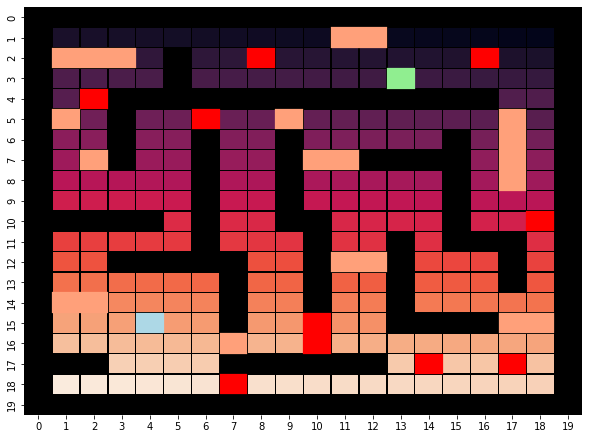

In [3]:
""" Function to always color the oil, bump, start, and green blocks.
 States are in the form of a list of (i,j) coordinates on the state matrix"""
def coloring_blocks(heatmap, oil_states, bump_states, start_state, end_state):
    # Adding red oil blocks
    for i in range(len(oil_states)):
        heatmap.add_patch(Rectangle((oil_states[i][1], oil_states[i][0]), 1, 1,
                                    fill=True, facecolor='red', edgecolor='red', lw=0.25))
    # Adding salmon bump blocks
    for i in range(len(bump_states)):
        heatmap.add_patch(Rectangle((bump_states[i][1], bump_states[i][0]), 1, 1,
                                    fill=True, facecolor='lightsalmon', edgecolor='lightsalmon', lw=0.25))
    # Adding start block (Blue)
    heatmap.add_patch(Rectangle((start_state[1], start_state[0]), 1, 1,
                                fill=True, facecolor='lightblue', edgecolor='lightblue', lw=0.25))

    # Adding end block (Green)
    heatmap.add_patch(Rectangle((end_state[1], end_state[0]), 1, 1,
                                fill=True, facecolor='lightgreen', edgecolor='lightgreen', lw=0.25))

# Example Use
plt.subplots(figsize=(10,7.5))    
heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, linecolor='black',
                      cbar= False, cmap= 'rocket_r')
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
coloring_blocks(heatmap, oil_states=[(2,8),(2,16),(4,2),(5,6),(10,18),(15,10),(16,10),(17,14),(17,17),(18,7)], bump_states=[(1,11),(1,12),(2,1),(2,2),(2,3),(5,1),(5,9),(5,17),(6,17),(7,2),(7,10),(7,11),(7,17),(8,17),(12,11),(12,12),(14,1),(14,2),(15,17),(15,18),(16,7)], \
                start_state=(15,4),end_state=(3,13))
plt.show()

**Implement Policy Iteration**

In [4]:
"""Initializations"""
value_matrix=np.copy(State_Matrix)
oil_states=[(2,8),(2,16),(4,2),(5,6),(10,18),(15,10),(16,10),(17,14),(17,17),(18,7)]
start_state=(15,4)
end_state=(3,13)
bump_states=[(1,11),(1,12),(2,1),(2,2),(2,3),(5,1),(5,9),(5,17),(6,17),(7,2),(7,10),(7,11),(7,17),(8,17),(12,11),(12,12),(14,1),(14,2),(15,17),(15,18),(16,7)]
actions=["left","right","up","down"]
def check_wall_state(i,j):
  if(np.isnan(value_matrix[i][j])):
    return True
  return False
def check_bump(i,j):
  if((i,j) in bump_states):
    return True
  return False
def check_oil(i,j):
  if((i,j) in oil_states):
    return True
  return False
def check_goal(i,j):
  if(i==end_state[0] and j==end_state[1]):
    return True
  return False
# use np.NAN to check if state is a wall state
# intialize policy to all left
policy=np.zeros((20,20))
for i in range(20):
  for j in range(20):
    if(np.isnan(value_matrix[i][j])):
      policy[i][j]=np.nan
      continue
    '''elif(check_goal(i,j)):
      policy[i][j]=np.nan
      value_matrix[i][j]=0'''
    value_matrix[i][j]=0


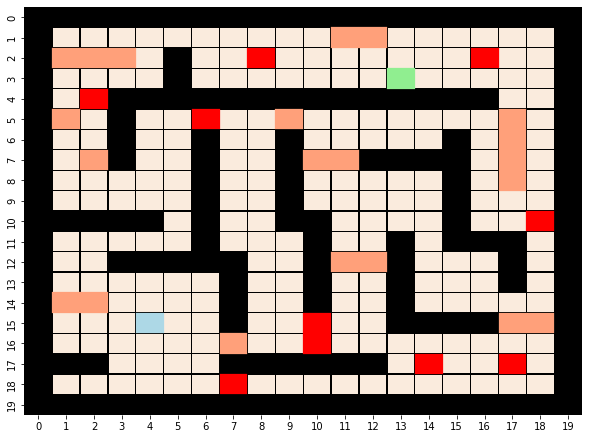

In [5]:
"""check intializations"""

assert(len(oil_states)==10)
assert(len(bump_states)==21)
assert(start_state==(15,4))
assert(end_state==(3,13))
for i in range(20):
  for j in range(20):
    if(check_wall_state(i,j)):# or check_goal_state(i,j)
      continue
    else:
      assert(actions[int(policy[i][j])]=="left")
assert(check_wall_state(0,1)==True)
assert(check_wall_state(19,0)==True)
assert(check_wall_state(0,19)==True)
assert(check_bump(1,11)==True)
assert(check_oil(2,8)==True)
plt.subplots(figsize=(10,7.5))    
heatmap = sns.heatmap(value_matrix, fmt=".2f", linewidths=0.25, linecolor='black',
                      cbar= False, cmap= 'rocket_r')
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
coloring_blocks(heatmap, oil_states=oil_states, bump_states=bump_states, \
                start_state=start_state,end_state=end_state)
plt.show()

In [6]:
def calc_reward(i1,j1,i2,j2):
  reward=-1
  i3=i2
  j3=j2
  if(check_wall_state(i2,j2)):
    i3=i1
    j3=j1
    if(check_bump(i1,j1)):
      reward-=10
    elif(check_oil(i1,j1)):
      reward-=5
    elif(check_goal(i1,j1)):
      #raise Exception("This situation should not arise. Moving from terminal goal state.")
      reward+=200
  else:
    if(check_bump(i2,j2)):
      reward-=10
    elif(check_oil(i2,j2)):
      reward-=5
    elif(check_goal(i2,j2)):
      reward+=200
  return reward,i3,j3
def left_action(i,j,p,values,gamma):
  total=0
  reward1,final_i1,final_j1=calc_reward(i,j,i,j-1)
  total+=(1-p)*(reward1+gamma*values[final_i1][final_j1])
  reward2,final_i2,final_j2=calc_reward(i,j,i,j+1)
  total+=(p/3)*(reward2+gamma*values[final_i2][final_j2])
  reward3,final_i3,final_j3=calc_reward(i,j,i-1,j)
  total+=(p/3)*(reward3+gamma*values[final_i3][final_j3])
  reward4,final_i4,final_j4=calc_reward(i,j,i+1,j)
  total+=(p/3)*(reward4+gamma*values[final_i4][final_j4])
  return total
def right_action(i,j,p,values,gamma):
  total=0
  reward1,final_i1,final_j1=calc_reward(i,j,i,j+1)
  total+=(1-p)*(reward1+gamma*values[final_i1][final_j1])
  reward2,final_i2,final_j2=calc_reward(i,j,i,j-1)
  total+=(p/3)*(reward2+gamma*values[final_i2][final_j2])
  reward3,final_i3,final_j3=calc_reward(i,j,i-1,j)
  total+=(p/3)*(reward3+gamma*values[final_i3][final_j3])
  reward4,final_i4,final_j4=calc_reward(i,j,i+1,j)
  total+=(p/3)*(reward4+gamma*values[final_i4][final_j4])
  return total
def up_action(i,j,p,values,gamma):
  total=0
  reward1,final_i1,final_j1=calc_reward(i,j,i-1,j)
  total+=(1-p)*(reward1+gamma*values[final_i1][final_j1])
  reward2,final_i2,final_j2=calc_reward(i,j,i,j+1)
  total+=(p/3)*(reward2+gamma*values[final_i2][final_j2])
  reward3,final_i3,final_j3=calc_reward(i,j,i,j-1)
  total+=(p/3)*(reward3+gamma*values[final_i3][final_j3])
  reward4,final_i4,final_j4=calc_reward(i,j,i+1,j)
  total+=(p/3)*(reward4+gamma*values[final_i4][final_j4])
  return total
def down_action(i,j,p,values,gamma):
  total=0
  reward1,final_i1,final_j1=calc_reward(i,j,i+1,j)
  total+=(1-p)*(reward1+gamma*values[final_i1][final_j1])
  reward2,final_i2,final_j2=calc_reward(i,j,i,j+1)
  total+=(p/3)*(reward2+gamma*values[final_i2][final_j2])
  reward3,final_i3,final_j3=calc_reward(i,j,i-1,j)
  total+=(p/3)*(reward3+gamma*values[final_i3][final_j3])
  reward4,final_i4,final_j4=calc_reward(i,j,i,j-1)
  total+=(p/3)*(reward4+gamma*values[final_i4][final_j4])
  return total
def policy_eval(values,policy,p,gamma):
  new_values=np.copy(values)
  for i in range(20):
    for j in range(20):
      if(check_wall_state(i,j)):
        continue
      else:
        action_to_take=int(policy[i][j])
        # case action = left
        if(action_to_take==0):
          new_values[i][j]=left_action(i,j,p,values,gamma)
        # case action = right
        elif(action_to_take==1):
          new_values[i][j]=right_action(i,j,p,values,gamma)
        # case action = up
        elif(action_to_take==2):
          new_values[i][j]=up_action(i,j,p,values,gamma)
        # case action = down
        else:
          new_values[i][j]=down_action(i,j,p,values,gamma)
  return new_values



In [7]:
from numpy.core.numeric import isclose
"""test methods of policy evaluation"""
def test_calc_reward():
  assert(calc_reward(18,17,17,17)==(-6,17,17))
  assert(calc_reward(16,17,15,17)==(-11,15,17))
  assert(calc_reward(16,16,15,16)==(-1,16,16))
  assert(calc_reward(18,18,18,17)==(-1,18,17))
  assert(calc_reward(18,18,17,18)==(-1,17,18))
  assert(calc_reward(18,18,19,18)==(-1,18,18))
  assert(calc_reward(18,18,18,19)==(-1,18,18))
  assert(calc_reward(17,13,17,14)==(-6,17,14))
  assert(calc_reward(7,2,7,3)==(-11,7,2))
test_calc_reward()
def test_left_action():
  assert(left_action(18,18,0.02,value_matrix,0.95)==-1)
test_left_action()
def test_right_action():
  assert(right_action(17,13,0.02,value_matrix,0.95)==-5.9)
test_right_action()
def test_up_action():
  assert(np.isclose(up_action(16,10,0.02,value_matrix,0.95),-5.9333))
  assert(np.isclose(up_action(7,2,0.5,value_matrix,0.95),-2.6666666))
test_up_action()
def test_down_action():
  assert(np.isclose(down_action(14,17,0.02,value_matrix,0.95),-10.8))
test_down_action()
def test_policy_eval():
  test_values=policy_eval(value_matrix,policy,0.02,0.95)
  assert(test_values[18][18]==-1)
  assert(np.isclose(test_values[5,18],-10.8))
test_policy_eval()

In [8]:
def improved_action(potentials):
  max_potential=np.max(potentials)
  max_list=[]
  for i in range(len(potentials)):
    if(np.isclose(potentials[i],max_potential)):
      max_list.append(i)
  return random.choice(max_list)
def policy_improv(old_policy,values,p,gamma):
  policy_stable=True
  new_policy=np.copy(old_policy)
  for i in range(20):
    for j in range(20):
      if(check_wall_state(i,j)): #or check_goal(i,j)
        continue
      else:
        potentials=[]
        potentials.append(left_action(i,j,p,values,gamma))
        potentials.append(right_action(i,j,p,values,gamma))
        potentials.append(up_action(i,j,p,values,gamma))
        potentials.append(down_action(i,j,p,values,gamma))
        new_policy[i][j]=improved_action(potentials)
        if(new_policy[i][j]!=old_policy[i][j]):
          policy_stable=False
        '''if(i==17 and j==15):
          print(potentials)'''
  return new_policy,policy_stable

In [9]:
"""test policy improv"""

def test_policy_improv():
  test_new_policy,test_policy_stable=policy_improv(policy,value_matrix,0.02,0.95)
  assert(test_new_policy[17][15]==1 or test_new_policy[17][15]==2 or test_new_policy[17][15]==3)
  #print(test_new_policy[17][15])
  assert(test_policy_stable==False)
test_policy_improv()

In [10]:
def calc_diff(value1,value2,threshold):
  status=True
  differences=[]
  for i in range(20):
    for j in range(20):
      if(check_wall_state(i,j)): #or check_goal(i,j)
        continue
      else:
        differences.append(np.abs(value1[i][j]-value2[i][j]))
  max_difference=max(differences)
  if(max_difference<threshold):
    status=False
  return status
def policy_diff(policy1,policy2): # fxn not used
  diff=False
  for i in range(20):
    for j in range(20):
      if(check_wall_state(i,j) or check_goal(i,j)):
        continue
      else:
        if(policy1[i][j]!=policy2[i][j]):
          diff=True
          break
  return diff
def policy_iteration(values,policy,p,gamma,threshold):
  input_value=np.copy(values)
  input_policy=np.copy(policy)
  policy_conv=False
  iter=0
  while(policy_conv==False):
    iter+=1
    if(iter>1000):
      break
    diff_exsists=True
    while(diff_exsists):
      final_value=policy_eval(input_value,input_policy,p,gamma)
      diff_exsists=calc_diff(final_value,input_value,threshold)
      input_value=final_value
    final_policy,policy_conv=policy_improv(input_policy,input_value,p,gamma)
    input_policy=final_policy
    #policy_conv=not(policy_diff(final_policy,input_policy))
  return input_policy,input_value,iter

In [11]:
op_policy,op_values,number_iter=policy_iteration(value_matrix,policy,0.02,0.95,0.01)

In [12]:
number_iter

110

In [13]:
def create_path_dict(policy):
  paths={}
  for i in range(20):
    for j in range(20):
      if(check_wall_state(i,j)): #check_goal(i,j) or 
        continue
      else:
        paths[(i,j)]=int(policy[i][j])
  return paths
def plot_policy(paths):
  # Define heatmap first
  plt.subplots(figsize=(13, 13))
  heatmap = sns.heatmap(value_matrix, fmt=".2f", linewidths=0.25, linecolor='black', cbar=False, cmap='rocket_r')
  heatmap.set_facecolor('black') 
  coloring_blocks(heatmap, oil_states=oil_states, bump_states=bump_states, \
                  start_state=start_state,end_state=end_state)
  for i in range(20):
    for j in range(20):
      if(check_wall_state(i,j)): #check_goal(i,j) or 
        continue
      else:
        direction=paths[(i,j)]
        r = i # x_coordinate
        c = j # y_coordinate

        if direction == 1:
            plt.arrow(c + 0.5, r + 0.5, 0.8, 0, width=0.04, color='black')   # Right
        if direction == 0:
            plt.arrow(c + 0.5, r + 0.5, -0.8, 0, width=0.04, color='black')  # Left
        if direction == 2:
            plt.arrow(c + 0.5, r + 0.5, 0, -0.8, width=0.04, color='black')  # Up
        if direction == 3:
            plt.arrow(c + 0.5, r + 0.5, 0, 0.8, width=0.04, color='black')  # Down
  # Show plot
  plt.show()
def plot_value_graph(values):
  plt.subplots(figsize=(13,13))
  heatmap = sns.heatmap(State_Matrix, fmt=".2f", annot= values, linewidths=0.25, linecolor='black',
                      cbar= False, cmap= 'rocket_r')

  heatmap.set_facecolor('black') # Color for the NA cells in the state matrix
  coloring_blocks(heatmap, oil_states=oil_states, bump_states=bump_states, \
              start_state=start_state,end_state=end_state)
  plt.show()
def plot_path(paths):
  iter=0
  state=start_state
  plt.subplots(figsize=(13, 13))
  heatmap = sns.heatmap(value_matrix, fmt=".2f", linewidths=0.25, linecolor='black', cbar=False, cmap='rocket_r')
  heatmap.set_facecolor('black') 
  coloring_blocks(heatmap, oil_states=oil_states, bump_states=bump_states, \
                  start_state=start_state,end_state=end_state)
  while(check_goal(state[0],state[1])==False):
    iter+=1
    if(iter>1000):
      break
    direction=paths[state]
    r=state[0]
    c=state[1]
    if direction == 1:
      state=(r,c+1)
      plt.arrow(c + 0.5, r + 0.5, 0.8, 0, width=0.04, color='black')   # Right
    if direction == 0:
      state=(r,c-1)
      plt.arrow(c + 0.5, r + 0.5, -0.8, 0, width=0.04, color='black')  # Left
    if direction == 2:
      state=(r-1,c)
      plt.arrow(c + 0.5, r + 0.5, 0, -0.8, width=0.04, color='black')  # Up
    if direction == 3:
      state=(r+1,c)
      plt.arrow(c + 0.5, r + 0.5, 0, 0.8, width=0.04, color='black')  # Down
  plt.show()
def draw_graphs(policy,values):
  path_dict=create_path_dict(policy)
  plot_policy(path_dict)
  plot_value_graph(values)
  plot_path(path_dict)

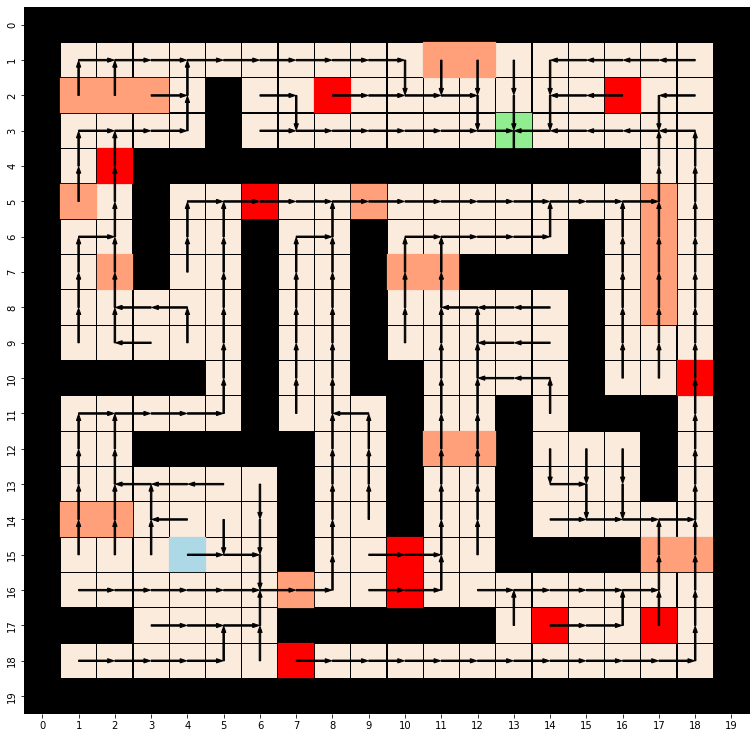

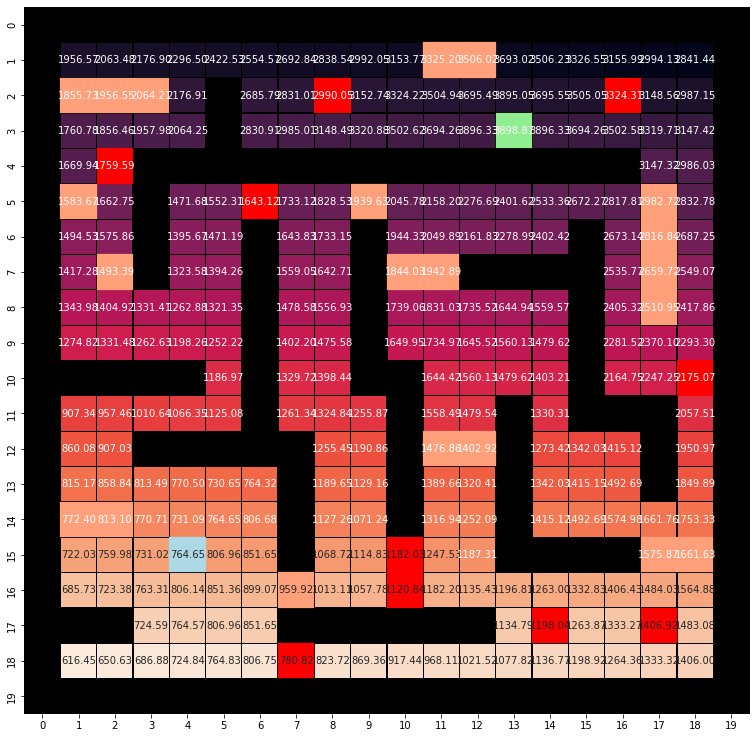

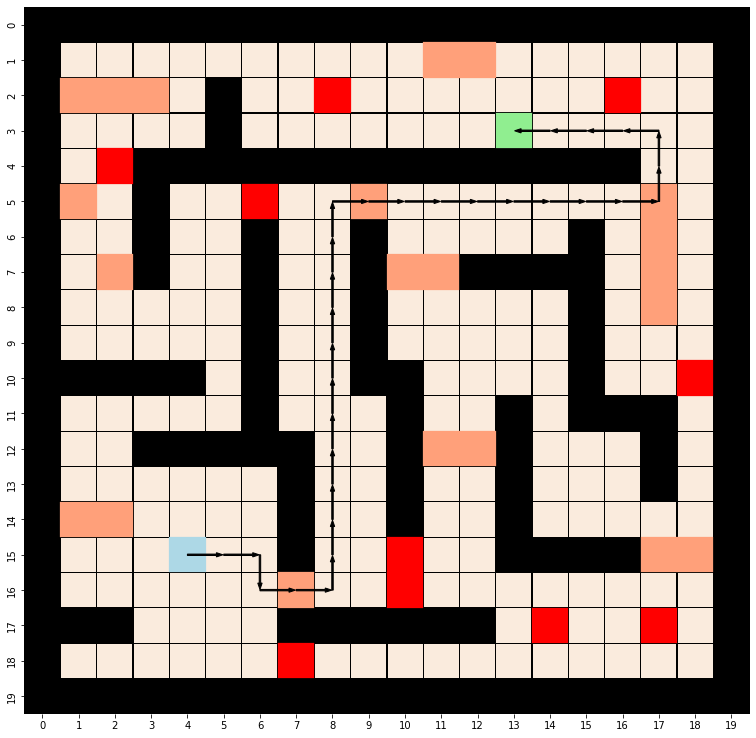

In [14]:
draw_graphs(op_policy,op_values)

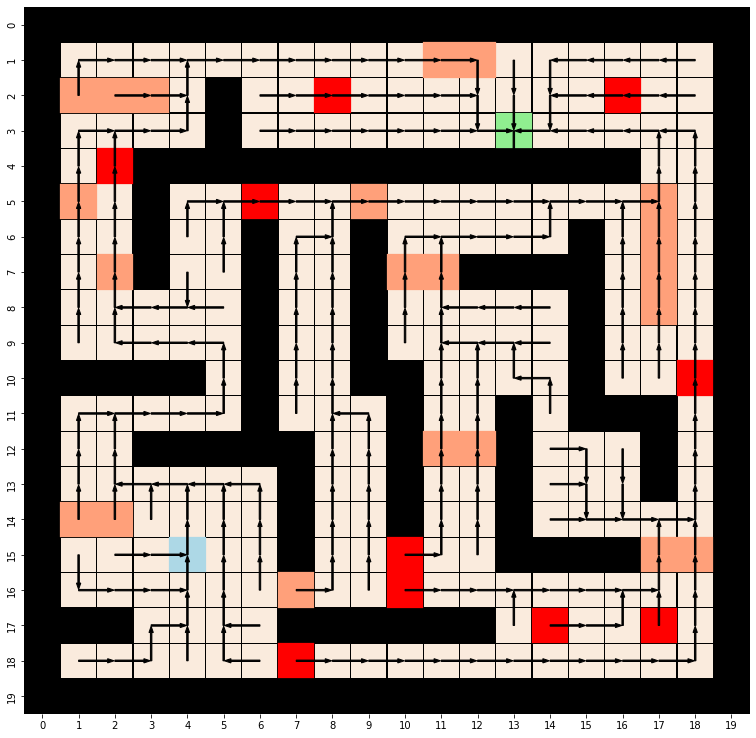

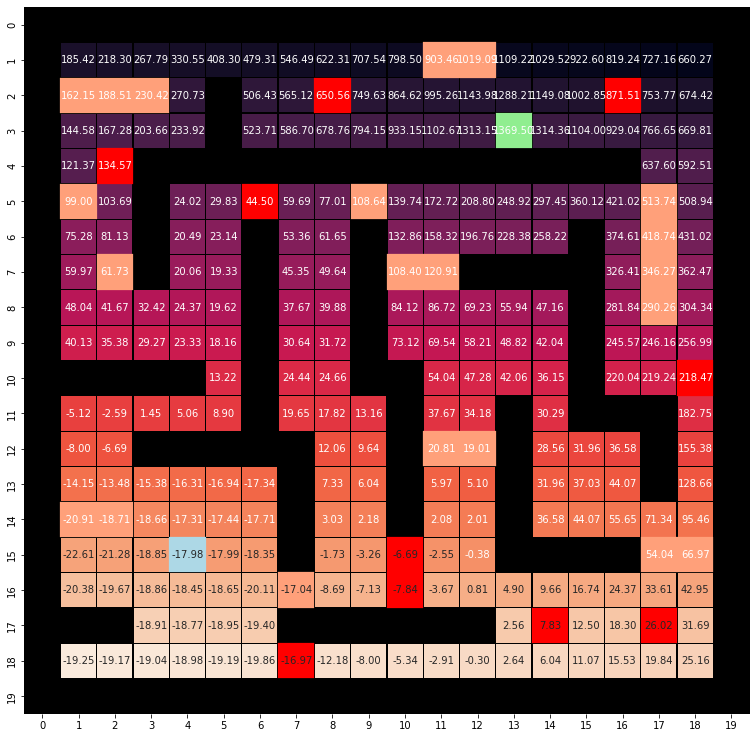

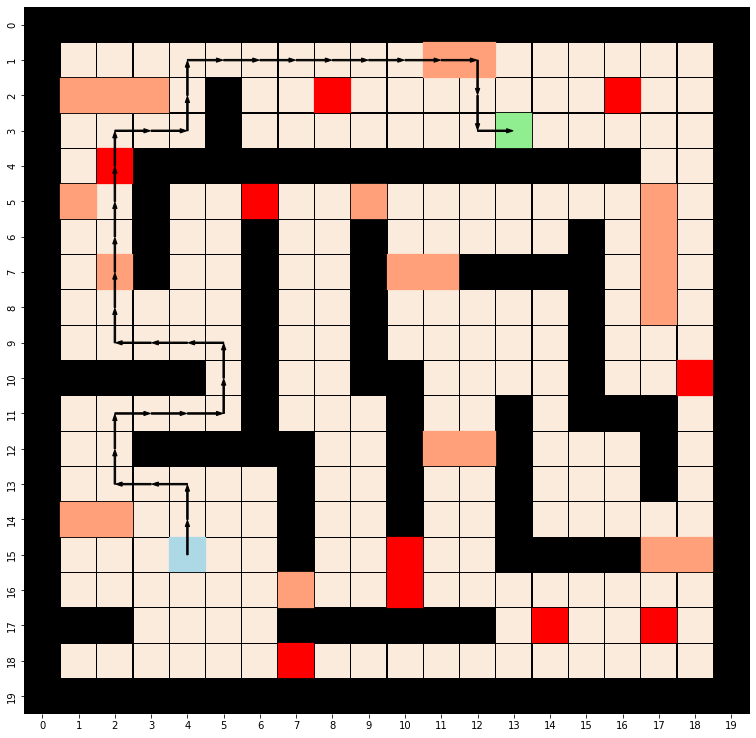

In [15]:
op_policy2,op_values2,number_iter2=policy_iteration(value_matrix,policy,0.5,0.95,0.01)
draw_graphs(op_policy2,op_values2)

In [16]:
number_iter2

9

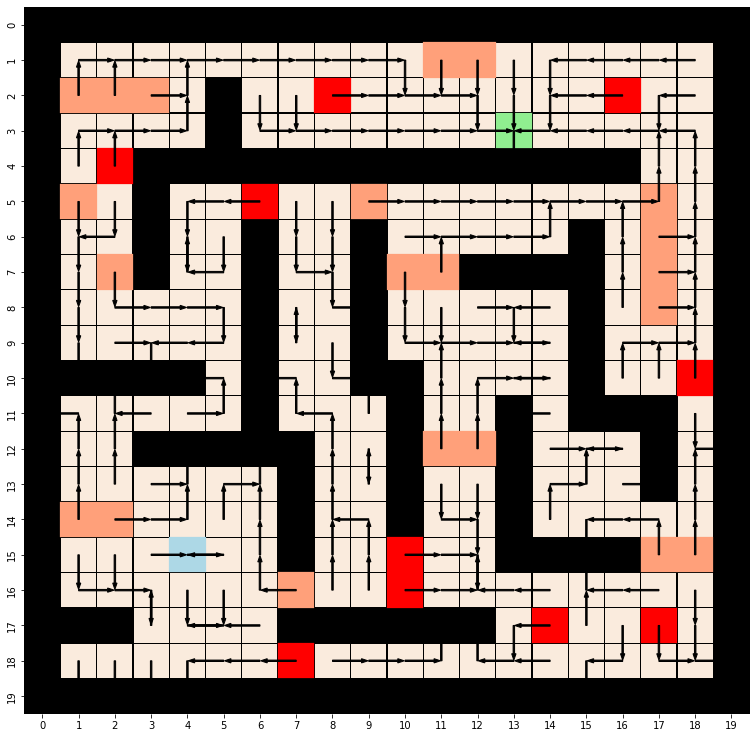

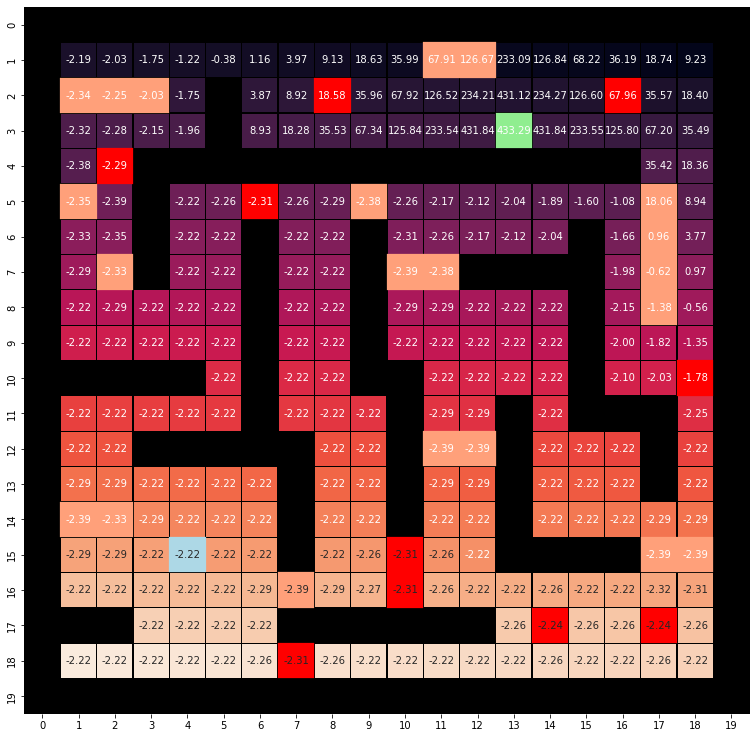

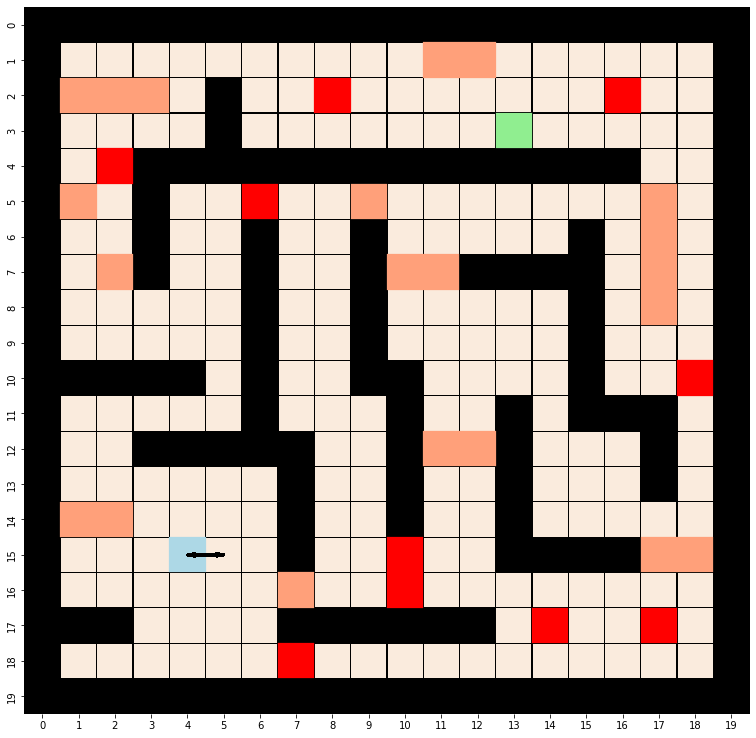

In [19]:
op_policy3,op_values3,number_iter3=policy_iteration(value_matrix,policy,0.02,0.55,0.01)
draw_graphs(op_policy3,op_values3)

In [20]:
number_iter3

1001

**IMPLEMENT VALUE ITERATION**

In [64]:
def value_iteration(policy,values,gamma,threshold,p):
  state_values=np.copy(values)
  diff_exsists=True
  iter=0
  while(diff_exsists):
    iter+=1
    if(iter>1000):
      break
    new_values=np.copy(state_values)
    for i in range(20):
      for j in range(20):
        if(check_wall_state(i,j)): #or check_goal(i,j)
          continue
        else:
          potentials=[]
          potentials.append(left_action(i,j,p,state_values,gamma))
          potentials.append(right_action(i,j,p,state_values,gamma))
          potentials.append(up_action(i,j,p,state_values,gamma))
          potentials.append(down_action(i,j,p,state_values,gamma))
          new_values[i][j]=max(potentials)
    diff_exsists=calc_diff(new_values,state_values,threshold)
    state_values=new_values
  final_policy,garbage_bool=policy_improv(policy,state_values,p,gamma)
  return final_policy,state_values,iter

In [65]:
vi_policy1,vi_values1,iter1=value_iteration(policy,value_matrix,0.95,0.01,0.02)

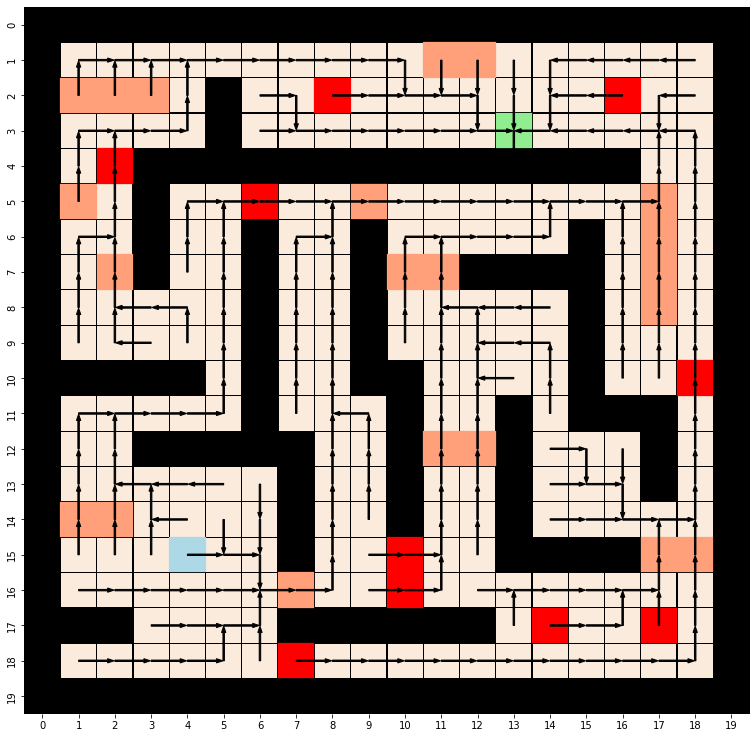

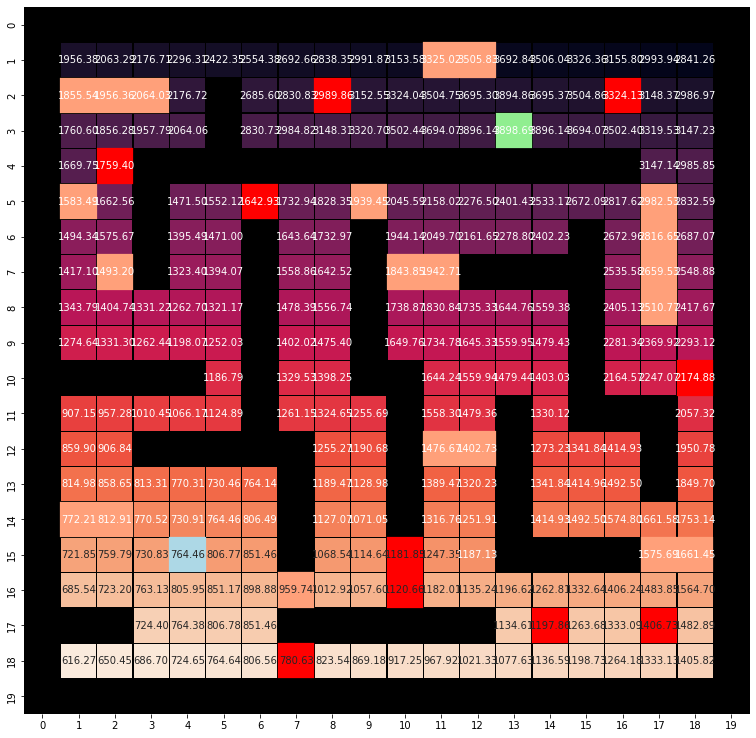

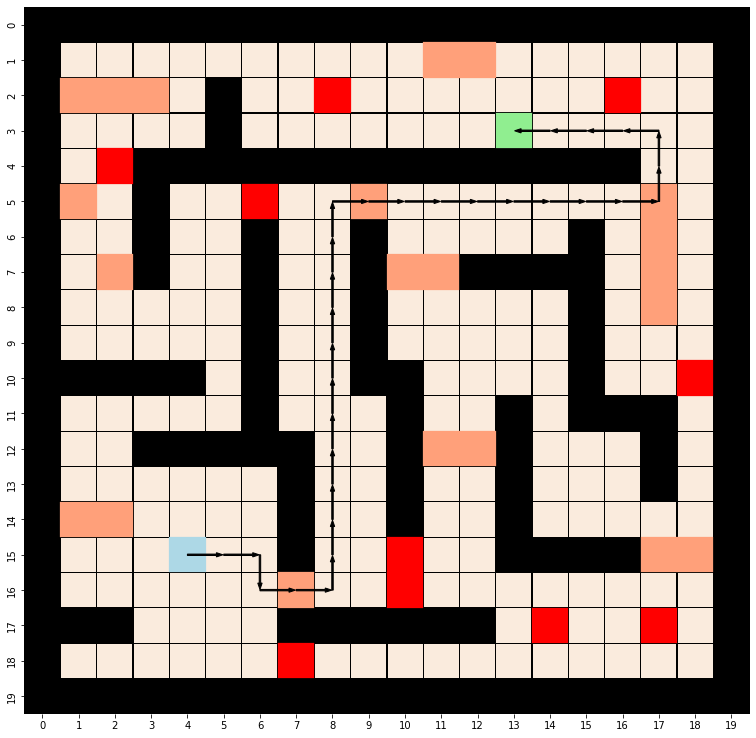

In [66]:
draw_graphs(vi_policy1,vi_values1)

In [67]:
iter1

194

In [68]:
vi_policy2,vi_values2,iter2=value_iteration(policy,value_matrix,0.95,0.01,0.5)

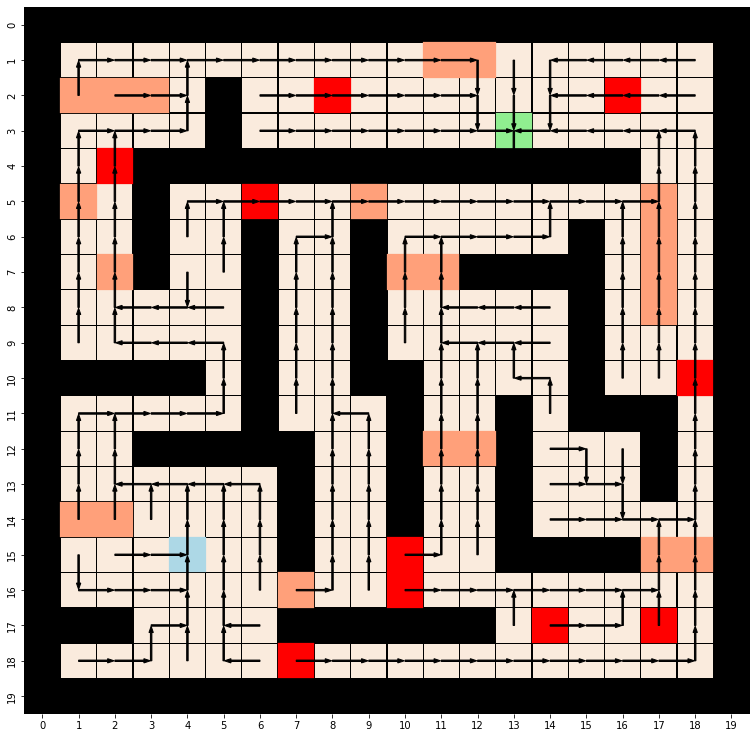

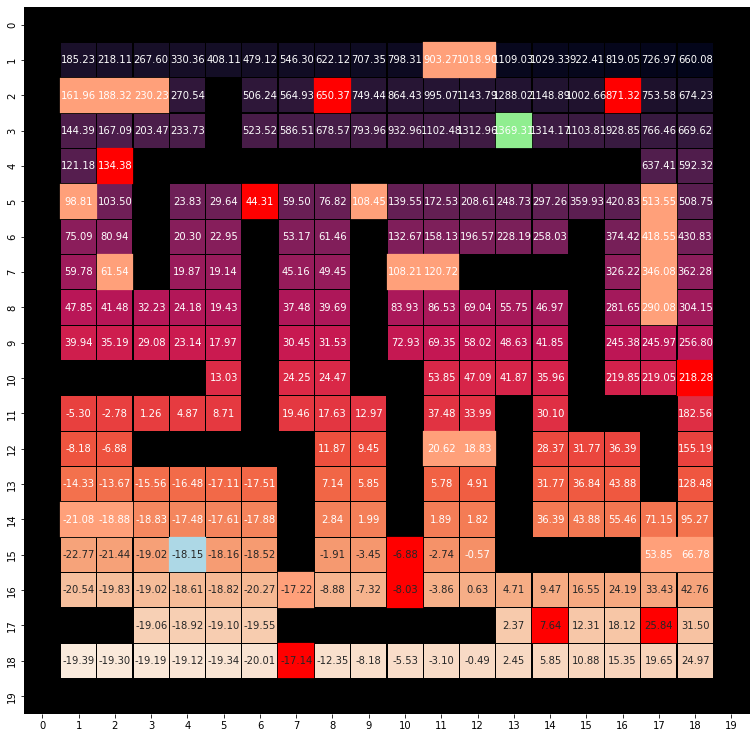

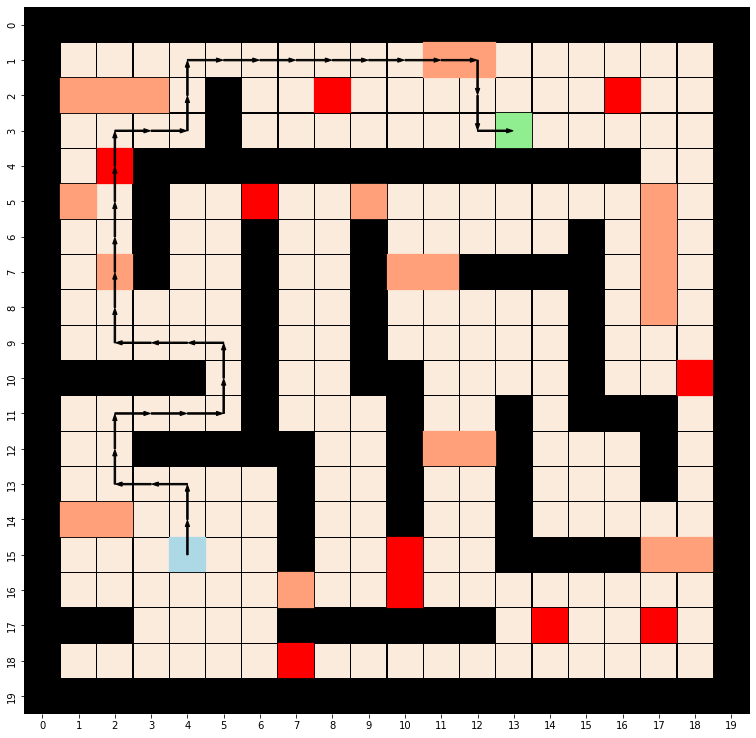

In [69]:
draw_graphs(vi_policy2,vi_values2)

In [70]:
iter2

171

In [71]:
vi_policy3,vi_values3,iter3=value_iteration(policy,value_matrix,0.55,0.01,0.02)

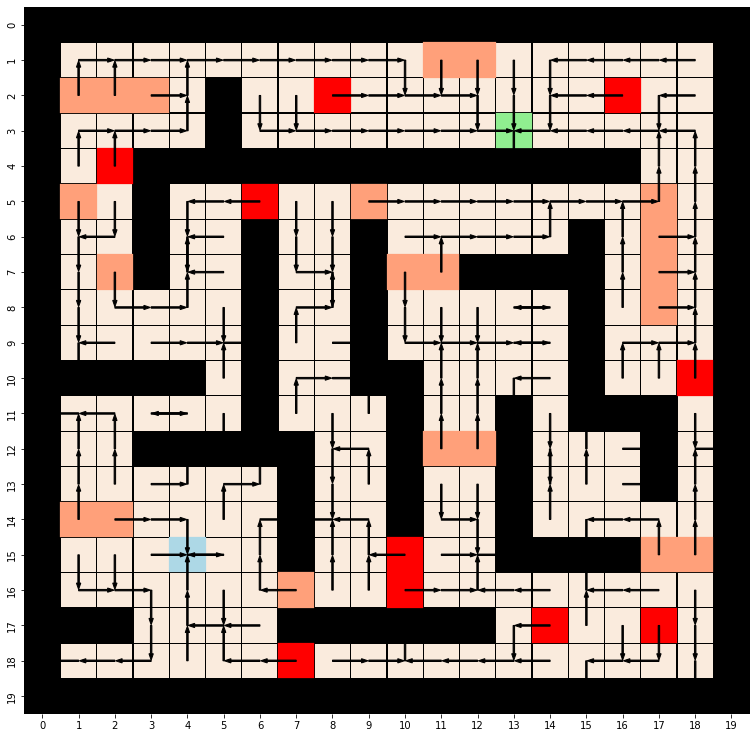

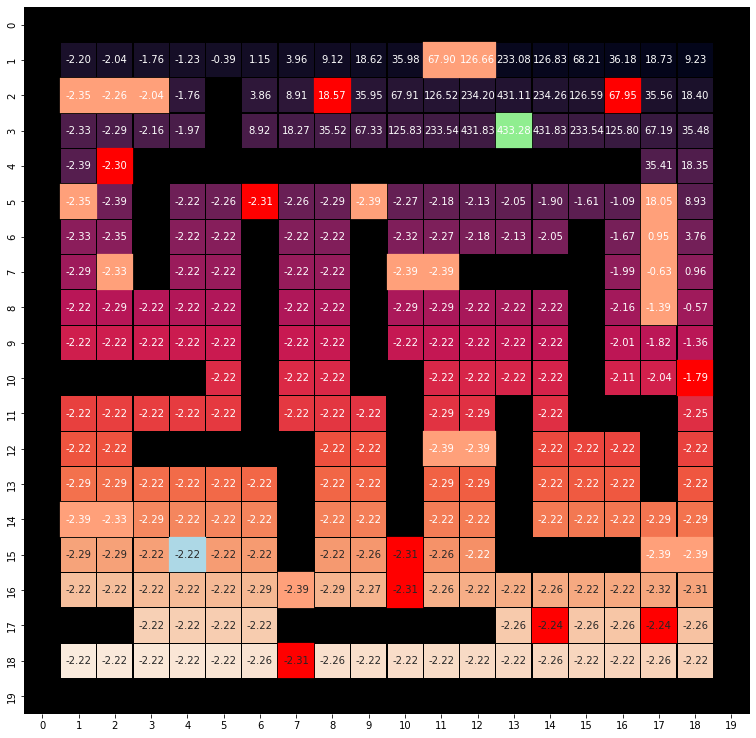

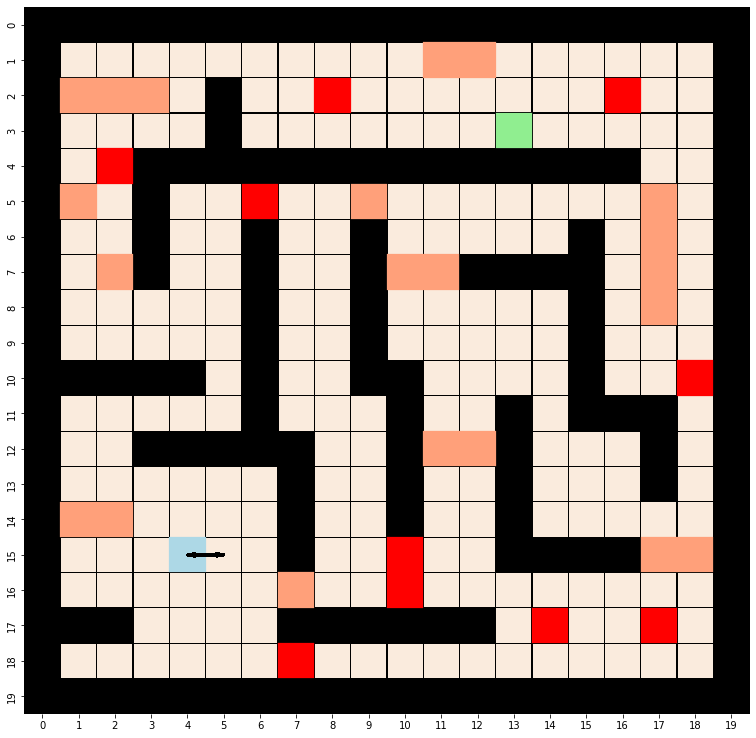

In [72]:
draw_graphs(vi_policy3,vi_values3)

In [73]:
iter3

18